### <center><p style="color:green;">Section 1: Business Understanding</p></center>

* <p style="color:magenta;">Question 1 - Where does our data come from?</p>
* <p style="color:magenta;">Question 2 - What are the most popular methods of learning to code?</p>
* <p style="color:magenta;">Question 3 - What is the most common education level in the IT branch?</p>

<b>Import libraries</b><br><br>
If there are any libraries below that you haven't yet installed, just use <span style="background-color: #505050">!pip install</span> in your cmd to install the necessary libraries

In [1]:
import pandas as pd 
import plotly.express as px
import seaborn as sns 
import requests
import zipfile
import io
%matplotlib inline

 <b>Downloading data</b>

In [2]:
# The path location for the survey data
url = 'https://cdn.stackoverflow.co/files/jo7n4k8s/production/49915bfd46d0902c3564fd9a06b509d08a20488c.zip/stack-overflow-developer-survey-2023.zip'
#We will use the requests library to download the data
r = requests.get(url)

# Extract the contents from the downloaded zipfile
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

### <center><p style="color:green;">Section 2: Data Understanding</p></center>

<b>Read the main file</b>

In [3]:
df=pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In the main file we have 83 questions

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

### <center><p style="color:green;">Section 3: Data Cleaning</p></center>

In [5]:
df.isnull().sum()

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64

<b>Check for missing values in the columns of interest in the survey dataframe</b>

Below are the columns of interest

In [6]:
columns_of_interest=['DevType','Currency','CompTotal','Age','YearsCode','EdLevel','LearnCode','LearnCodeCoursesCert','OrgSize','PurchaseInfluence','Country']

In [7]:
# Checking for any missing values in the columns of interest
df[columns_of_interest].isnull().sum()

DevType                 12312
Currency                23850
CompTotal               40959
Age                         0
YearsCode                1749
EdLevel                  1211
LearnCode                1521
LearnCodeCoursesCert    52108
OrgSize                 24141
PurchaseInfluence       24220
Country                  1211
dtype: int64

Since we have a lot of missing values in the CompTotal column, we will prepare the data for each question separately, because we also want to save all the data from Country column.

### <center><p style="color:green;">Section 4: Results</p></center>

<p style="color:magenta;">Question 1 - Where does our data come from?</p>

To descibe the data from the point of geographically view. We will use <span style="background-color: #505050">scatter_geo</span> from plotly library.

In [9]:
#Data preparation
GeoData=df[['Country']] #getting necessary information
GeoData.dropna(subset='Country',inplace=True)  #deleting missing values
GeoData = GeoData.groupby(['Country'])['Country'].count()
GeoData=GeoData.to_frame()
GeoData.rename(columns={'Country':'Amount'},inplace=True)
GeoData.reset_index(inplace=True)
#Sorting values in descending order
GeoData.sort_values('Amount', inplace=True, ascending=False)

#Geo plot
plot = px.scatter_geo(GeoData, locations='Country',
                      hover_name='Country',
                      hover_data='Amount',
                      locationmode ='country names',
                      size='Amount',
                      color = 'Amount',
                      #text='Amount',
                      projection="natural earth",
                      width=1000,
                      height=600
                      )
plot.update_layout(
        title = 'Plot 1. Number of responses from every country',
        paper_bgcolor="#FBD5AB"
    )
plot.show()
plot.write_html('index.html')

C:\Users\dimpi\AppData\Local\Temp\ipykernel_16880\756824311.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We can clearly see that the highest number of response we have got from the U. S. But also we can mention that Germany has the second place. It could also be seen on bar plot

In [10]:

plot=px.bar(GeoData.head(10),
            x='Country',
            y='Amount',
            title="Plot 2. Number of responses from each country",
            width=1000,
            height=600,
            text_auto=True
            )
plot.update_layout(
    paper_bgcolor="#FBD5AB",
    plot_bgcolor='#F0FFF0'
)
plot.show()
with open('index.html', 'a') as f:
    f.write(plot.to_html(full_html=False, include_plotlyjs='cdn'))

* <p style="color:magenta;">Question 2 - What are the most popular methods of learning to code?</p>

In this part we will better understand how people from stackoverflow prefer to learn

In [11]:
#Data preparation
Method_of_learning_to_code=df[['LearnCode']]
methods=['Books / Physical media','Coding Bootcamp','Colleague',
         'Friend or family member','Hackathons (virtual or in-person)','Online Courses or Certification','On the job training',
         'Other online resources (e.g., videos, blogs, forum)','School (i.e., University, College, etc)']
counts=[]
#since one person could have multiple ansewers on this question we need to count all the insistances
for method in methods:
    count=0
    for person in Method_of_learning_to_code['LearnCode']:
        if method in str(person):
            count+=1
    counts.append(count)
data={'Methods':methods,'Number of responses':counts}
data=pd.DataFrame(data)
data=data.sort_values('Number of responses',ascending=False)


#Data visualisation
fig = px.histogram(
    data,
    x='Methods',
    y='Number of responses',
    title='Plot 3. Popularity of learning resourses',
    labels={'Number of responses':'Responses'},
    width=1000,
    height=600,
    text_auto=True
    )
fig.update_layout(
    paper_bgcolor="#FBD5AB",
    plot_bgcolor='#F0FFF0'
)
fig.show()
with open('index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

Since we have exact information about the Course and Certifications people prefer (because we have certain question about it), <br>let's find out which Online Schools are the most popular among the asked people.

In [12]:
#Data preparation
Online_schools=df[['LearnCodeCoursesCert']]
schools=['Codecademy','Coursera','edX','Pluralsight','Skillsoft','Udacity','Udemy']
counts=[]
#since one person could have multiple ansewers on this question we need to count all the insistances
for school in schools:
    count=0
    for person in Online_schools['LearnCodeCoursesCert']:
        if school in str(person):
            count+=1
    counts.append(count)
data={'Schools':schools,'Number of responses':counts}
data=pd.DataFrame(data)
data=data.sort_values('Number of responses',ascending=False)


#Data visualisation
fig = px.histogram(
    data,
    x='Schools',
    y='Number of responses',
    title='Plot 4. Popularity of Online Schools',
    labels={'Schools': 'Online Schools', 'Number of responses':'Responses'},
    width=1000,
    height=600,
    text_auto=True
    )
fig.update_layout(
    paper_bgcolor="#FBD5AB",
    plot_bgcolor='#F0FFF0'
)
fig.show()
with open('index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

We can clearly see that <b>Udemy</b> is the absolute leader in this category. With the double difference from the second place <b>Coursers</b>.

<p style="color:magenta;">Question 3 - What is the most common education level in the IT branch?</p>

To answer this question, we will firstly take a look at the situation in general.<br> After that we will have a close look only at certain roles.<br><br> General information:

C:\Users\dimpi\AppData\Local\Temp\ipykernel_16880\3104666252.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0.5, 1.0, 'What is the most common education level in the IT branch?')]

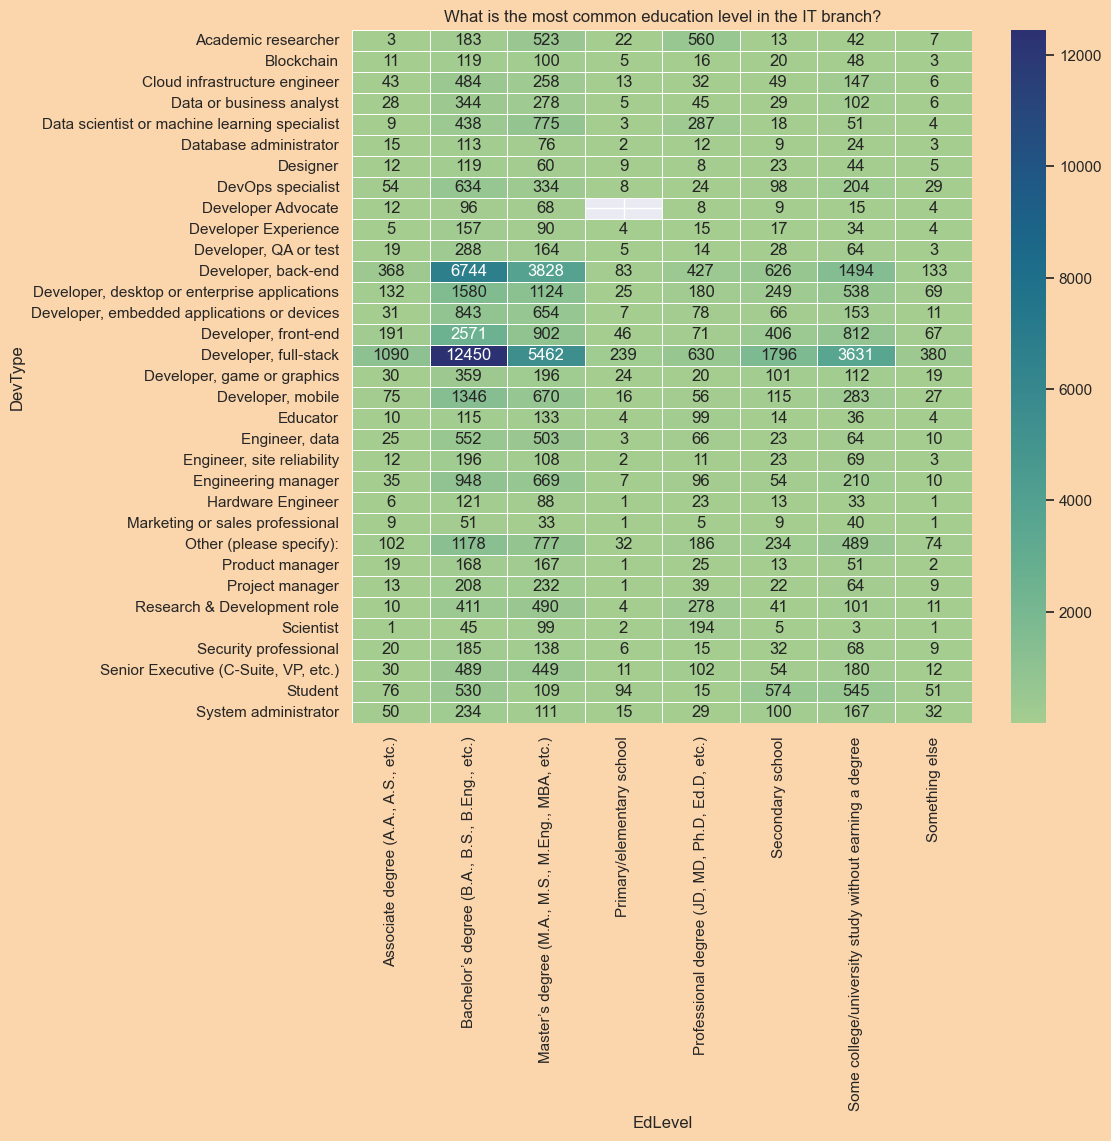

In [13]:
#Data preparation
EdLevel_and_Job=df[['EdLevel','DevType', 'LearnCode']]
dict={'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'Secondary school'}
EdLevel_and_Job.replace(dict, inplace=True)
data=EdLevel_and_Job.groupby(['EdLevel','DevType'], as_index=False).count()
data=data.pivot(index='EdLevel', columns='DevType',values='LearnCode')
data=data.T

sns.set(rc = {'figure.figsize':(10, 9),'figure.facecolor':'#FBD5AB'})
sns.heatmap(
    data,
    xticklabels=data.columns,
    linewidth=.5,
    cmap="crest",
    annot=True,
    fmt=".0f"
    ).set(title='What is the most common education level in the IT branch?')

We can mention the general prevalence of Bachelor's and Master's degrees over other types of education. 

From this huge amount of information we can also examine parts from <b>Developer Advocate</b> to <b>Developer, mobile</b>.<br>
Let's take a closer look at this part:

C:\Users\dimpi\AppData\Local\Temp\ipykernel_16880\3619331701.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0.5, 1.0, 'What is the most common education level in the IT branch?')]

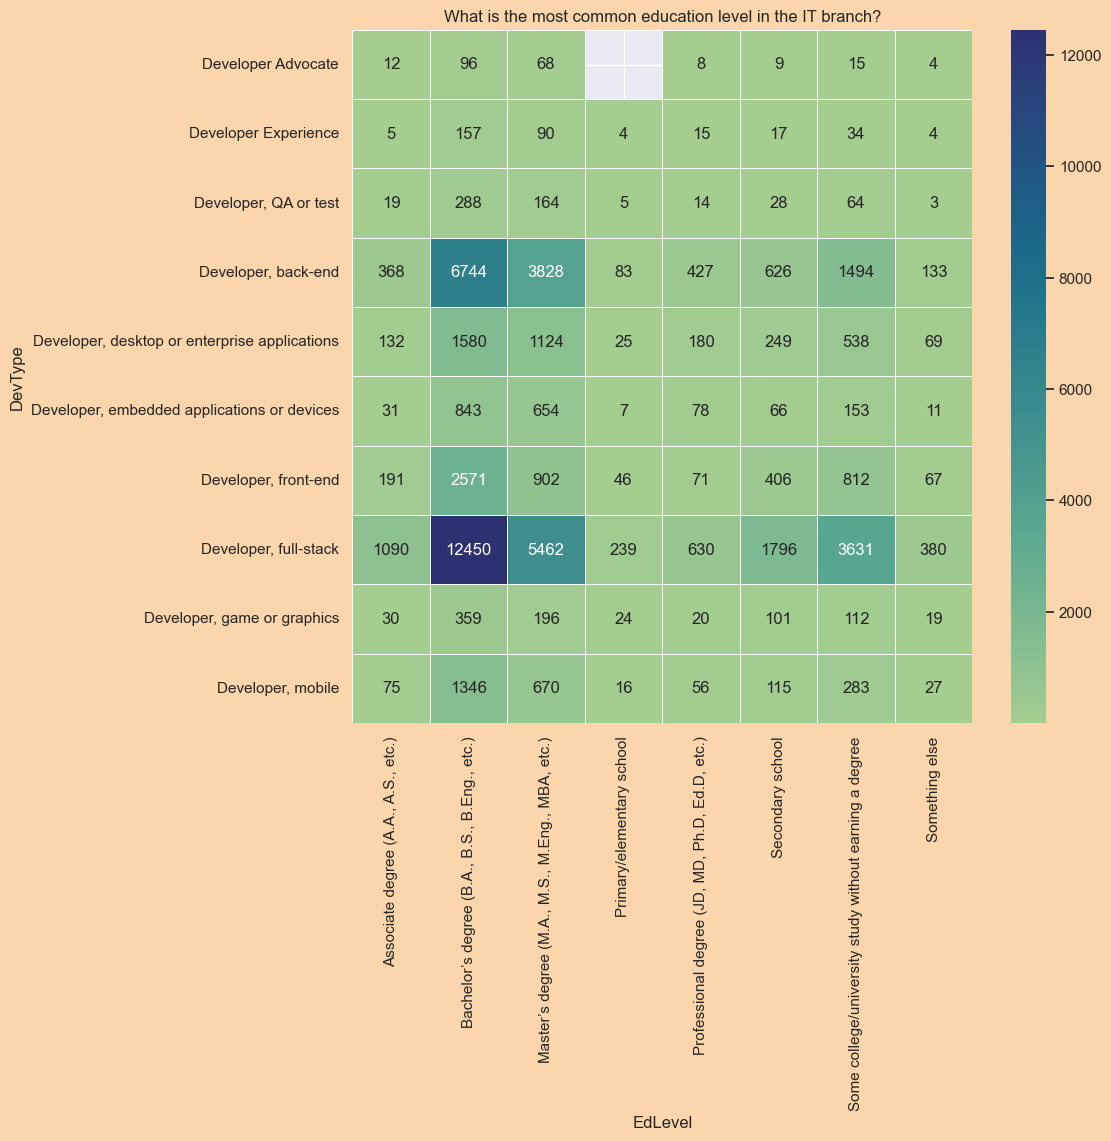

In [14]:
EdLevel_and_Job=df[['EdLevel','DevType', 'LearnCode']]
dict={'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'Secondary school'}
EdLevel_and_Job.replace(dict, inplace=True)
data=EdLevel_and_Job.groupby(['EdLevel','DevType'], as_index=False).count()
data=data.pivot(index='EdLevel', columns='DevType',values='LearnCode')
data=data[data.columns[8:18]]
data=data.T


sns.set(rc = {'figure.figsize':(10, 9),'figure.facecolor':'#FBD5AB'})
sns.heatmap(
    data,
    xticklabels=data.columns,
    linewidth=.5,
    cmap="crest",
    annot=True,
    fmt=".0f"
    ).set(title='What is the most common education level in the IT branch?')

As the chart shows, the number of <b>Developers, full-stack</b> and <b>Developers, back-end</b> with Bachelor's or Master's degree are the highist in the dataset.<br>
Also, the interesting thing is that there are no <b>Developers Advocates</b> with the <b>Primary/elementary school</b> education.

### <center><p style="color:green;">Section 5: Conclusion</p></center>

<b>Key Points:</b>

* We can clearly see that the biggest number of employee responses we got from the U. S..
* We can clearly see that the IT branch mostly consists of employees who have a Bachelor's or Master's degree .

This dataset has a lot of information that we did not use in this project, so more likely it has other interesting insights. 